<a href="https://colab.research.google.com/github/KongpobI/8-Puzzle/blob/main/8Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **8-Puzzle**

## BFS 8 (Blind Search)

In [ ]:
import time

def gen_successors(node):
    global last_index
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    ans = []
    while True:
        ans.insert(0,[current_node[0][1:4],current_node[0][4:7],current_node[0][7:]])
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]
    for i in ans :
        print(i[0])
        print(i[1])
        print(i[2])
        print()

In [ ]:
def insert_all_bfs(node,fringe):
    children = gen_successors(node)
    nodeCount = len(children)
    for child in children:
        fringe.append(child)
    return nodeCount

def bfs(start_node,show):
    global last_index
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    countRemove = 0
    countInsert = 0
    start = time.time()
    while True:
        if time.time() - start >= 120 :
          print("Out of time (BFS run over than 120 Sec)")
          return["Out of time (BFS run over than 120 Sec"]
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        countRemove += 1
        if is_goal(front):
            if show ==1 :
                show_result(front,visited_node)
            return {"Remove":countRemove,"Generate":countInsert, "Time":time.time() - start}
        countInsert += insert_all_bfs(front,fringe)

In [ ]:
state = '8413256780'
a = bfs((state,0,-1,0),1)
a

413
256
780

413
256
708

413
206
758

413
026
758

013
426
758

103
426
758

123
406
758

123
456
708

123
456
780



{'Remove': 2496, 'Generate': 7042, 'Time': 0.037576913833618164}

##DFS (Blind Search)

In [ ]:
def insert_all_dfs(node,fringe):
    children = gen_successors(node)
    nodeCount = len(children)
    for child in children:
        fringe[0:0] = [child]
    return nodeCount

def dfs(start_node,show):
    global last_index
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    countRemove = 0
    countInsert = 0
    start_time = time.time()
    while True:
        current_time = time.time()
        elapsed_time = current_time - start_time
        if elapsed_time >= 120 : # Limit time
          print("Out of time (DFS run over than 120 Sec)")
          return ["Out of time (DFS run over than 120 Sec)"]
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        countRemove += 1
        if is_goal(front):
          if show == 1 :
            show_result(front,visited_node)
          return {"Remove":countRemove,"Generate":countInsert, "Time":time.time() - start_time}
        countInsert += insert_all_dfs(front,fringe)

In [ ]:
state = '8413256780'
a = dfs((state,0,-1,0),0)
a

## IDS (Blind Search)

In [ ]:
def dfs_c(start_node,limited_level,show, start):
    global last_index
    global countRemove
    global countInsert
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        current_time = time.time()
        if current_time - start >= 120 :
          print("Out of time (IDS run over than 120 Sec)")
          return False
        if len(fringe) == 0:
            # print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        countRemove += 1
        if is_goal(front):
            if show == 1 :
              show_result(front,visited_node)
            return {"Remove":countRemove,"Generate" :countInsert, "time":time.time() - start}
        if front[3] == limited_level:
            continue
        countInsert += insert_all_dfs(front,fringe)

def ids(start_node, show) :
  global countRemove
  global countInsert
  global startTime
  countRemove = 0
  countInsert = 0
  start = time.time()
  for i in range(100):
      # print("Limit Search at level "+str(i+1))
      a = dfs_c((start_node,0,-1,0),i,show,start)
      if a:
          break
  return a

state = '8413256780'
ids(state, 0)

{'Remove': 4678, 'Generate': 4676, 'time': 0.011774301528930664}

## **Compare with each Search algorithms**

In [ ]:
bfs_info = bfs((state,0,-1,0),0)
dfs_info = dfs((state,0,-1,0),0)
ids_info = ids(state,0)

Out of time (DFS run over than 120 Sec)




---
จะเห็นว่า DFS ใช้เวลารันนานมากจนเกินเวลาที่ตั้งไว้ 2 นาที


In [ ]:
print("BFS node generate:",bfs_info["Generate"], "runtime", bfs_info["Time"])
print("IDS node generate:",ids_info["Generate"], "runtime", ids_info["time"])

BFS node generate: 7042 runtime 0.0385584831237793
IDS node generate: 4676 runtime 0.010650157928466797




---

BFS generate node มากกว่า IDS นั่นคือ BFS กินmemoryมากกว่า IDS
ส่วนในเรื่องของ Runtime จะเห็นว่า IDS ทำงานได้ไวกว่า BFS เล็กน้อย

สรุปแล้วจะเห็นว่า

*   Breadth First Search (BFS) จะค้นหาโดยแตกnodeทางกว้างทำให้สามารถหา least solution ได้ค่อนข้างไว แต่จะกินmemory
*   Depth First Search (DFS) จะแก้ปัญหาของ BFS ในเรื่องของการกิน memory แต่จะไปเกิดปัญหาใหม่คือใช้เวลาทำงานนาน
*   Iterative Deeping Search (IDS) จะสามารถแก้ปัญหาของ BFS(กินMemory) และ DFS(long runtime) ได้





Text(0.5, 1.0, 'Generate node')

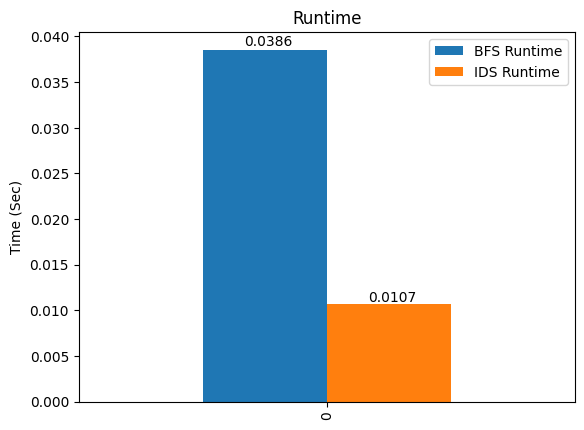

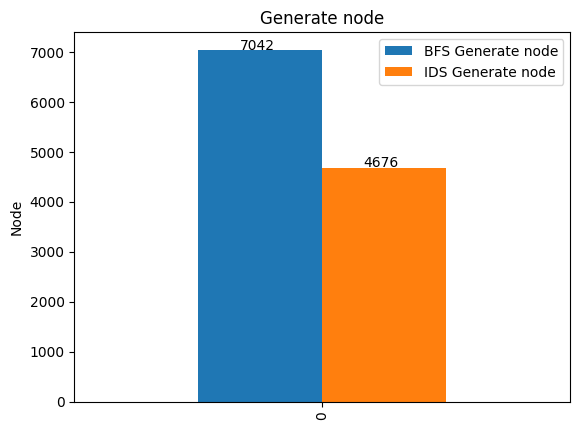

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

rt = pd.DataFrame({"BFS Runtime":[bfs_info["Time"]], "IDS Runtime":[ids_info["time"]] })
rt.plot(kind = "bar")
plt.text(-1/6,0.039,round(bfs_info["Time"],4))
plt.text(1/12,0.011,round(ids_info["time"],4))
plt.ylabel("Time (Sec)")
plt.title("Runtime")

node = pd.DataFrame({"BFS Generate node":[bfs_info["Generate"]], "IDS Generate node":[ids_info["Generate"]] })
node.plot(kind = "bar")
plt.text(-1/6,7050,round(bfs_info["Generate"],4))
plt.text(1/12,4700,round(ids_info["Generate"],4))
plt.ylabel("Node")
plt.title("Generate node")